# ::: BANK MARKETING :::

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [62]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [64]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [65]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [66]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<Axes: >

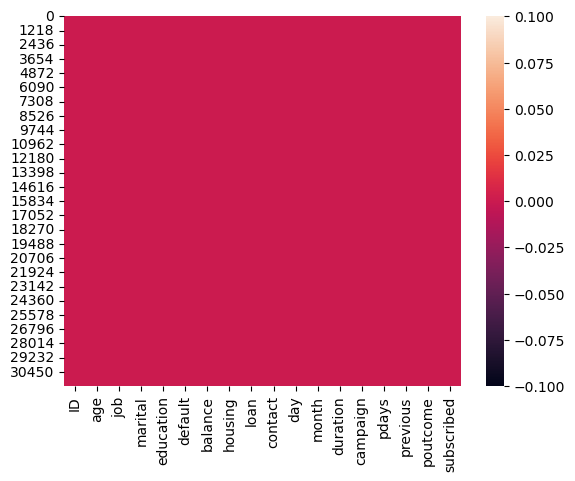

In [67]:
sns.heatmap(df.isnull())

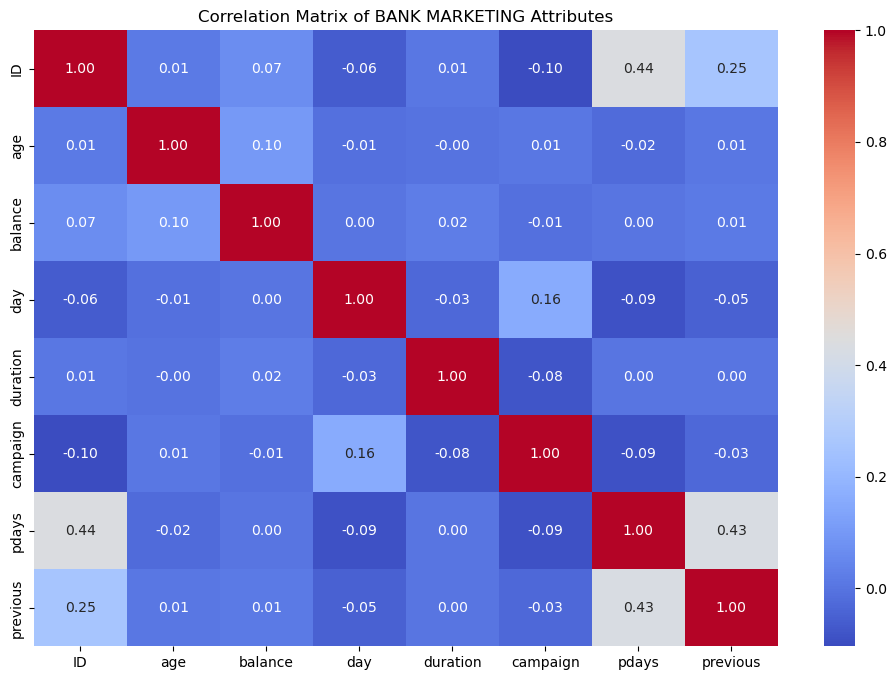

In [68]:
plt.figure(figsize=(12,8),facecolor="white")
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='coolwarm',linecolor="black",cbar=True)
plt.title("Correlation Matrix of BANK MARKETING Attributes")
plt.show()

In [69]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Converting categorical values into numerical values

In [70]:
label_encoder = LabelEncoder()

In [71]:
df['job'] = label_encoder.fit_transform(df['job'])

In [72]:
df['marital'] = label_encoder.fit_transform(df['marital'])

In [73]:
df['education'] = label_encoder.fit_transform(df['education'])

In [74]:
df['housing'] = label_encoder.fit_transform(df['housing'])

In [75]:
df['loan'] = label_encoder.fit_transform(df['loan'])

In [76]:
df['contact'] = label_encoder.fit_transform(df['contact'])

In [77]:
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])

In [78]:
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

In [79]:
df['month'] = label_encoder.fit_transform(df['month'])

In [80]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,no,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,no,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,no,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,no,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,no,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,no,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,no,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,no,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,no,225,1,0,1,15,8,22,7,337,12,0,0


In [81]:
linear_regression=LinearRegression()

In [82]:
df=df.drop(columns=['default'])

In [83]:
df=df.drop(columns=['ID'])

In [84]:
df=df.drop(columns=['poutcome'])
df=df.drop(columns=['previous'])


In [85]:
df=df.drop(columns=['pdays'])

In [86]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [87]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
0,56,0,1,3,1933,0,0,1,19,9,44,2
1,31,11,1,1,3,0,0,0,20,5,91,2
2,27,7,1,1,891,1,0,0,18,5,240,1
3,57,4,0,2,3287,0,0,0,22,6,867,1
4,31,9,1,1,119,1,0,0,4,3,380,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,12,8,116,2
31643,53,4,0,2,380,0,1,0,5,6,438,2
31644,32,4,2,2,312,0,0,0,7,1,37,3
31645,57,9,1,1,225,1,0,1,15,8,22,7


In [88]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [90]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred = linear_regression.predict(x_test)

In [92]:
y_pred

array([ 0.03295992,  0.04426806, -0.01241282, ...,  0.01412556,
        0.07403161,  0.02670697])

In [93]:
mse = mean_squared_error(y_test,y_pred)

In [94]:
mse

0.0836053971512984

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0836053971512984
R-squared: 0.1817486367330945


In [96]:
df_test = pd.read_csv('termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [97]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [99]:
df_test['job'] = label_encoder.fit_transform(df_test['job'])

In [100]:
df_test['marital'] = label_encoder.fit_transform(df_test['marital'])

In [101]:
df_test['education'] = label_encoder.fit_transform(df_test['education'])

In [102]:
df_test['housing'] = label_encoder.fit_transform(df_test['housing'])

In [103]:
df_test['loan'] = label_encoder.fit_transform(df_test['loan'])

In [104]:
df_test['contact'] = label_encoder.fit_transform(df_test['contact'])

In [105]:
df_test['poutcome'] = label_encoder.fit_transform(df_test['poutcome'])

In [106]:
df_test['month'] = label_encoder.fit_transform(df_test['month'])

In [107]:
df_test=df_test.drop(columns=['default'])
df_test=df_test.drop(columns=['ID'])
df_test=df_test.drop(columns=['poutcome'])
df_test=df_test.drop(columns=['previous'])
df_test=df_test.drop(columns=['pdays'])

In [108]:
df_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
0,32,7,1,1,118,1,0,0,15,8,20,6
1,78,5,0,0,2787,0,0,1,1,5,372,1
2,31,6,2,2,144,1,0,2,16,8,676,1
3,57,7,2,0,3777,1,0,1,13,8,65,2
4,45,1,0,1,-705,0,1,2,3,5,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,0,0,28,1,148,4
13560,54,1,1,0,2281,1,0,2,20,6,158,1
13561,35,5,1,0,285,1,0,0,29,4,136,1
13562,29,0,2,1,464,0,0,0,9,9,208,2


In [109]:
df_test.shape

(13564, 12)

In [110]:
y_pred_test = linear_regression.predict(df_test)

In [111]:
y_pred_test

array([-0.00043425,  0.21891457,  0.27008586, ...,  0.01961851,
        0.20439738,  0.17150421])

In [117]:
for pred in y_pred_test:
    if pred < 0:
        print("Customer will not subscribe.")
    else:
        print("Customer will subscribe.")

Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will not subscribe.
Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will subscribe.
Customer will not subscribe.
Customer will not subscribe.
Custom